<a href="https://colab.research.google.com/github/nhs-pycom/coding-club/blob/main/introduction-to-matplotlib/introduction_to_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 Introduction to matplotlib
*December 2021*


---
---


#### 🔎 **About this session**

This session will give an introduction to one of the most commonly used data visualisation libraries in python, matplotlib.

> Information on matplotlib can be found here:
- https://matplotlib.org/

This session will cover:

*   Plotting line plots in matplotlib
*   Formatting matplotlib plots
*   Generating subplots
*   How to generate, barcharts, boxplots and pie charts

---

#### ☑ **Prerequisites**

- This session will assume a working knowledge of what has been covered in previous sessions which can be found here: https://github.com/nhs-pycom/.
- In particular understanding of pandas and using dataframes. Please refer to this session for more information: https://github.com/nhs-pycom/coding-club-Python-Data-Wrangling

---

#### 🥇 **Why is data visualisation important?**

As described in [DataViz: improving data visualisation for the
public sector](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/7611/1318351.pdf):

> *Effective visualisation of data can help users explore and understand data,
and also communicate that understanding to others:*

> * *Exploring and analysing: Data visualisation can be of great use in the analysis process, enabling researchers to explore datasets to identify patterns, associations, trends and so on. Good visualisation should be seen
as a central tool in carrying out analysis.*

> * *Presenting and communicating: Good data visualisations should help others make robust decisions based on the data being presented: They should provide an effective representation of the underlying data, to help answer a particular question at hand. Communicating data in this way might: support senior decision-makers engaged in strategic planning, or operations managers needing to understand where services could be improved, or managers wanting to monitor performance*

---


#### 📚 **Additional Reading**
The following are helpful resources for best practice and accessibility guidelines.

*   Helpful cheatsheets for matplotlib: https://matplotlib.org/cheatsheets
*   Examples of different plots in matplotlib: https://matplotlib.org/stable/gallery/index.html 
*   ONS standards for chart visulisations: https://style.ons.gov.uk/category/data-visualisation/
*  Introduction to data visualisation by the government statistical service: https://gss.civilservice.gov.uk/policy-store/introduction-to-data-visualisation/
*   Guide to accessibility: https://gss.civilservice.gov.uk/policy-store/making-analytical-publications-accessible/
*   Presenting data: 5 tips for making your data understandable: https://dataingovernment.blog.gov.uk/2021/03/02/presenting-data-5-tips-for-making-your-data-understandable/



## 🦌 **Importing the data**

For this session we will be visualising data about changing Reindeer populations in Svalbard from 1978 to 2020 in three areas:

*  Brøggerhalvøya
*  Reindalen
*  Adventdalen

The data we will be using is from the MOSJ (Environmental Monitoring of Svalbard and Jan Mayen). MOSJ is an environmental monitoring system and part of Norwegian's Government’s environmental monitoring in Norway. (More information about MOSJ can be found here: https://www.mosj.no/en/about/).

> The data we will be using can be found here: https://www.mosj.no/en/fauna/terrestrial/svalbard-reindeer-population.html 

This page also provides useful visualisation of the reindeer populations over time in the three areas of Svalbard we will be looking at today.

---
NOTE: If the `collect_data` function does not work it is possible to download the data as a csv from: https://www.mosj.no/en/fauna/terrestrial/svalbard-reindeer-population.html. Please click the blue `Data` tab below each chart and click to download the csv for each area (3 in total).

---
#### *Additonal Notes (out of scope for this session):*
- *If you would like to find out more about json files: https://realpython.com/python-json/*

- *If you would like to find out more about the requests:  https://docs.python-requests.org/en/latest/*


In [1]:
# Creating a function to import the data for the three separate areas.
# Out of scope for this session

import requests
import pandas as pd

def collect_data(url: str) -> pd.DataFrame:
  """
  This function collects data from  https://www.mosj.no/en/fauna/terrestrial/svalbard-reindeer-population.html
  json data files.
  """
  # download raw json object
  resp = requests.get(url)
  txt = resp.json()
   # get data and save to dataframe (df)
  df = pd.DataFrame(txt["feed"]["entries"][0]["data"])
  # get placename and create a new column in the dataframe to record the placename (df)
  df["placename"] = txt["feed"]["entries"][0]["locations"][0]["placename"]
  return df

In [2]:
area_1 = collect_data(url="https://api.npolar.no/indicator/timeseries/?q=&format=json&limit=1&facets=false&filter-systems=mosj.no&filter-id=a73ce4d3-14c8-5052-b088-7936fa708819")
area_2 = collect_data(url="https://api.npolar.no/indicator/timeseries/?q=&format=json&limit=1&facets=false&filter-systems=mosj.no&filter-id=5ff85a0f-4266-579d-a864-e5e7c323a1bb")
area_3 = collect_data(url="https://api.npolar.no/indicator/timeseries/?q=&format=json&limit=1&facets=false&filter-systems=mosj.no&filter-id=ccd8cc25-7e73-5a67-8dac-e557813ebb00") 

In [3]:
area_1.head()

,when,value,placename
0,1978,12,Brøggerhalvøya
1,1979,18,Brøggerhalvøya
2,1980,22,Brøggerhalvøya
3,1981,26,Brøggerhalvøya
4,1982,38,Brøggerhalvøya


In [4]:
area_2.head()

,when,value,placename
0,1979,466,Reindalen
1,1980,492,Reindalen
2,1981,475,Reindalen
3,1982,534,Reindalen
4,1983,583,Reindalen


In [5]:
area_3.head()

,when,value,placename
0,1979,457,Adventdalen
1,1980,653,Adventdalen
2,1981,538,Adventdalen
3,1982,664,Adventdalen
4,1983,769,Adventdalen


## 📈 **Introduction to Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

More information:
https://matplotlib.org/

Helpful cheatsheets for matplotlib:
https://matplotlib.org/cheatsheets/

Most of the functionality of matplotlib is in pyplot, so today we will be focussing on the pyplot module.



In [6]:
# import the pyplot module in matplotlib
import matplotlib.pyplot as plt

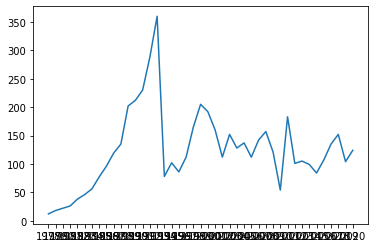

In [7]:
# Lets plot a simple plot for area_1

x = area_1["when"]
y = area_1["value"]

plt.plot(x, y)
plt.show() # show the plot

### Exercise 1

Can you recreate the plot above using the area_2 dataframe?

In [8]:
# Please write your solution below:


**Discuss:** What is missing from the plots in this section?

# ✅ **Formatting a matplotlib plot**

When creating plots it is important it is clear what the plot is trying to show. There are many different ways you can format your plot.


**Plot Components:**

A figure holds all the plot elements, and there are a number of settings such as the size of figure which can be adjusted. More info here: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure

A helpful breakdown of different parts of a figure can be found below: 

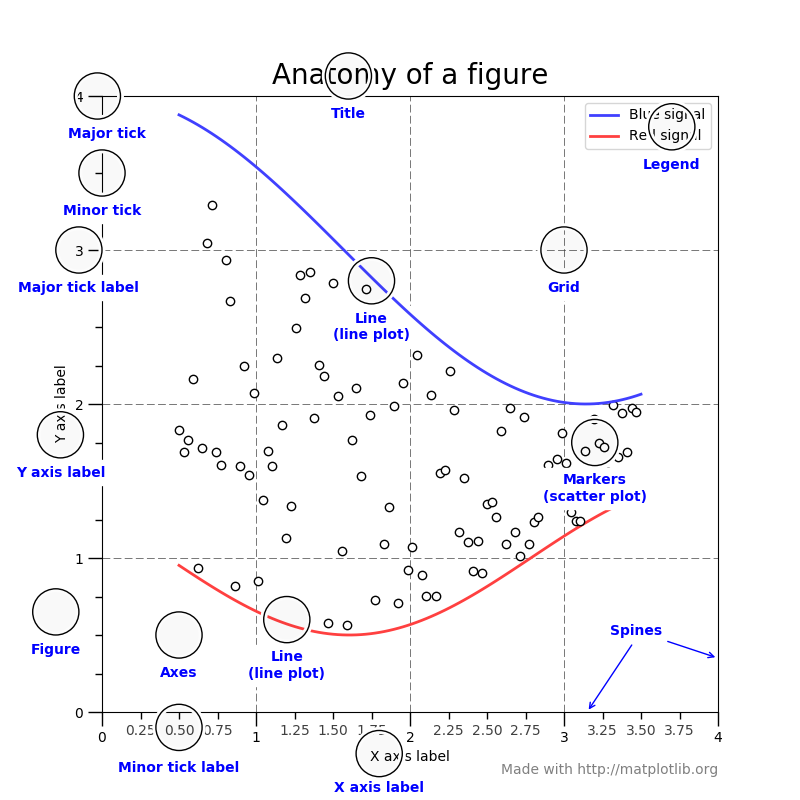

### Lets try to clear up the first plot

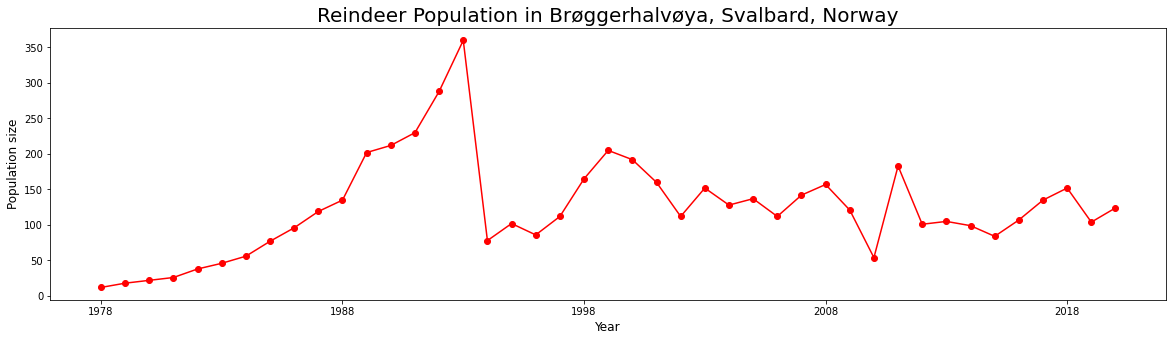

In [9]:
# Formatting the plot for area_1 so it is clearer

fig, ax = plt.subplots(figsize=(20,5))  # creating a figure with a single Axes.

x = area_1["when"]
y = area_1["value"]

ax.plot(x, y, marker = 'o', color="r")  # plot the figure on the defined axes with circle markers and line colour red.

plt.title("Reindeer Population in Brøggerhalvøya, Svalbard, Norway", fontsize=20) # set the title and the font size for the title
ax.set_xlabel("Year", fontsize=12) # set x axis label and font size
plt.xticks(fontsize=10) # set the font size for the x axis values (in this case increase the font of the years)
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Only display five dates at equal spacing to make the graph easier to read 

ax.set_ylabel("Population size", fontsize=12) # set y axis label and font size

plt.show() 

### Exercise 2

Can you improve your plot for area_2 in the first exercise (e.g. add a title? label the axis?)

💡 More information on the different setting you can use can be found here: https://matplotlib.org/stable/tutorials/introductory/pyplot.html

In [10]:
# Please write your solution below:


# 🎁 **pandas and matplotlib**

In this notebook the data we are using is stored in a pandas dataframe.

Pandas offers a wrapper for matplotlib, this offers a shortcut to quickly view plots and helps with formatting.

More information on the method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html


More information on this can be found here:
*   https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html
*   https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html



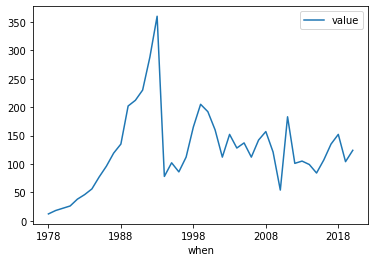

In [11]:
# Example of how to do a quick plot just using pandas (do not need to specifically install Matplotlib)

area_1.plot("when", "value") # Using the plot method to plot the two columns in the dataframe.

As the figure is a matplotlib object we can use the same formatting as before.

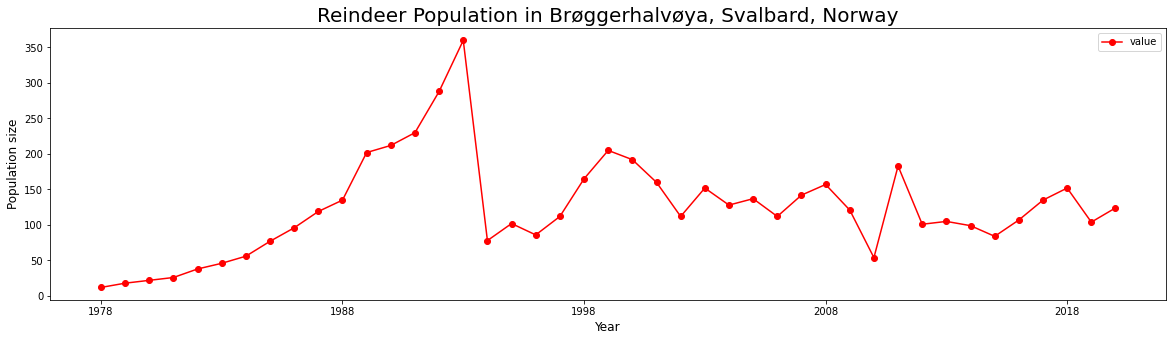

In [12]:
# formatting a plot using pandas method

fig, ax = plt.subplots(figsize=(20,5))  # creating a figure with a single Axes.

area_1.plot("when", "value", marker = 'o', color="r", ax=ax) # here we have specified the columns in the dataframe we want to plot and have defined the marker and colour of the line as before. Here we have specified the axes of the plot in the method by defining ax.

plt.title("Reindeer Population in Brøggerhalvøya, Svalbard, Norway", fontsize=20) # set the title and the font size for the title
ax.set_xlabel("Year", fontsize=12) # set x axis label and font size
plt.xticks(fontsize=10) # set the font size for the x axis values (in this case increase the font of the years)
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Only display five dates at equal spacing to make the graph easier to read 

ax.set_ylabel("Population size", fontsize=12) # set y axis label and font size

plt.show() 

### Exercise 3

Can you duplicate your plot from exercise 2 but using the pandas method to create the matplotlib chart?

In [13]:
# Please write your solution below:


# 📈📈 **Plotting multiple plots**

It is possible to plot more than one set of plots on one figure.

Below we will walk through how to do this using pandas dataframes. 

In [14]:
# Combining area_1 and area_2 together

area_1_p = area_1.pivot(index="when", columns="placename", values="value") # Pivot pandas table to simplify join
area_2_p = area_2.pivot(index="when", columns="placename", values="value") # Pivot pandas table to simplify join
area_1_2 = area_1_p.merge(area_2_p, how="left", on="when") # Join dataframe on year

area_1_2.head()

placename,Brøggerhalvøya,Reindalen
when,,
1978,12,NaN
1979,18,466.0
1980,22,492.0
1981,26,475.0
1982,38,534.0


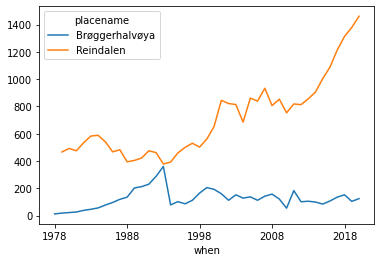

In [15]:
# Now we have formatted this table in this way we can not easily plot both areas on the same plot

area_1_2.plot()

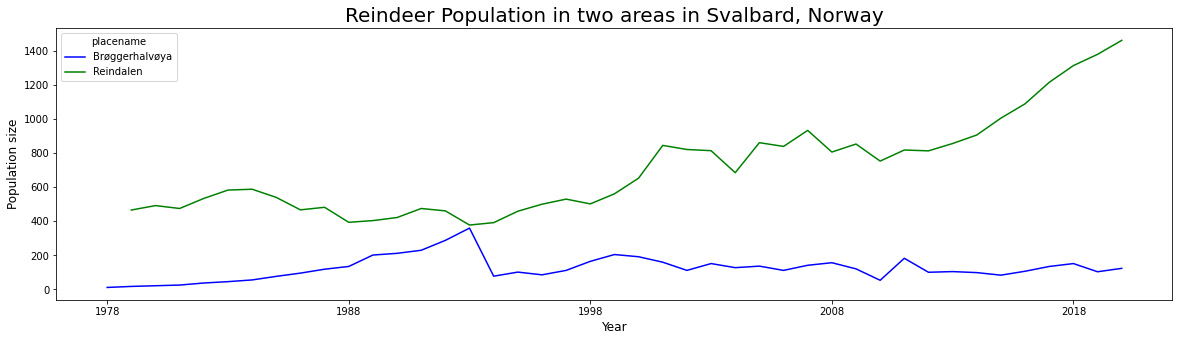

In [16]:
# the formatting we have used before will work here as well

fig, ax = plt.subplots(figsize=(20,5))  # creating a figure with a single Axes.

area_1_2.plot(ax=ax, color=["b", "g"])  # colours in order of the columns

plt.title("Reindeer Population in two areas in Svalbard, Norway", fontsize=20) # set the title and the font size for the title
ax.set_xlabel("Year", fontsize=12) # set x axis label and font size
plt.xticks(fontsize=10) # set the font size for the x axis values (in this case increase the font of the years)
ax.xaxis.set_major_locator(plt.MaxNLocator(5)) # Only display five dates at equal spacing to make the graph easier to read 
ax.set_ylabel("Population size", fontsize=12) # set y axis label and font size

plt.show() 

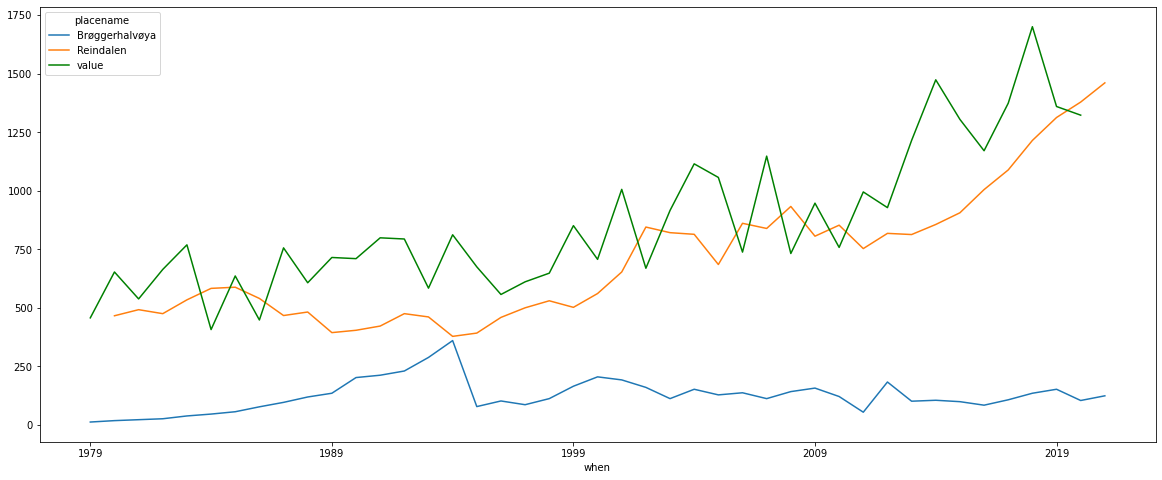

In [17]:
# NOTE: It is possible to plot data from two different dataframes on the same ax by defining this in .plot()

fig, ax = plt.subplots(figsize=(20,8)) # Define the subplots arrangment and figure size.

area_1_2.plot(ax=ax) # Plot data from the first df on ax

area_3.plot("when","value", color="g", ax=ax,) # Plot data from the second df on the same ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b9880eed0>,
      dtype=object)

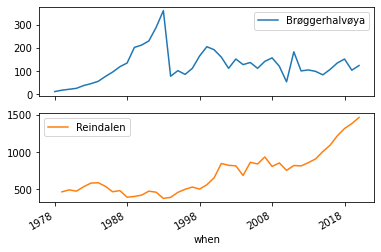

In [18]:
# It is possible to quickly plot the data in one dataframe into two subplots using pandas

area_1_2.plot(subplots=True)

### Exercise 4

**Discuss and note:** 

*   Which plot above best communicates the differences between the reindeer population (the plot where data appears on the same plot or subplot)?
*   When is it best to use a subplot or to plot the data on the same graph?



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b98985ed0>,
      dtype=object)

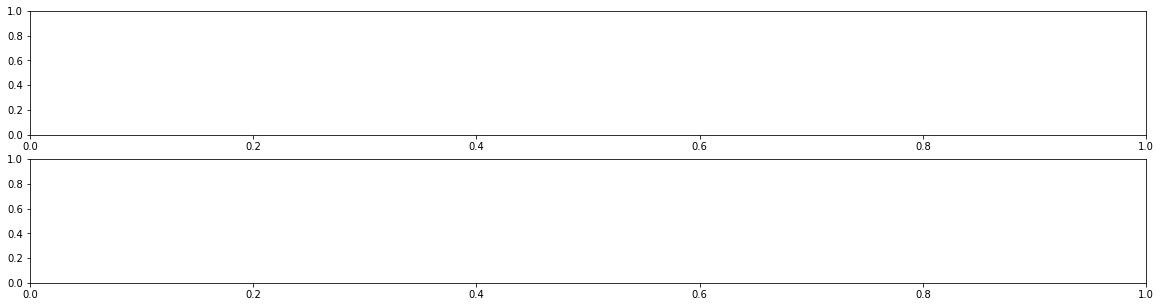

In [19]:
# This creates two subplots above eachother

fig, axes = plt.subplots(2, 1, figsize=(20,5)) # Define the subplots arrangment and figure size.
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b99057890>,
      dtype=object)

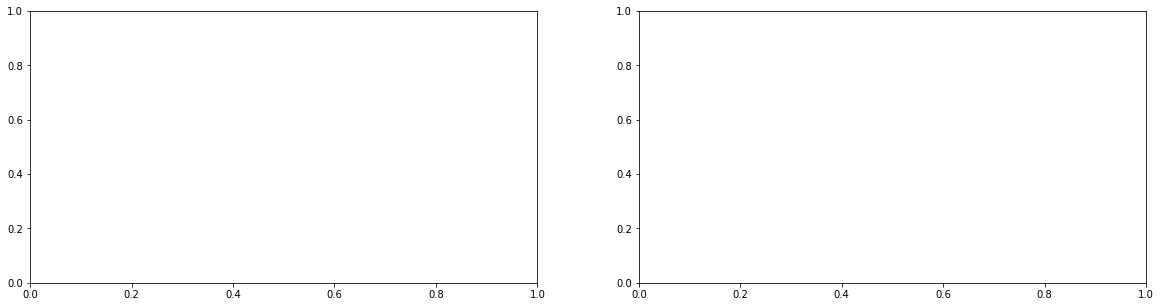

In [20]:
# This creates two subplots next to eachother

fig, axes = plt.subplots(1, 2, figsize=(20,5)) # Define the subplots arrangment and figure size.
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b98ac8a10>,
      dtype=object)

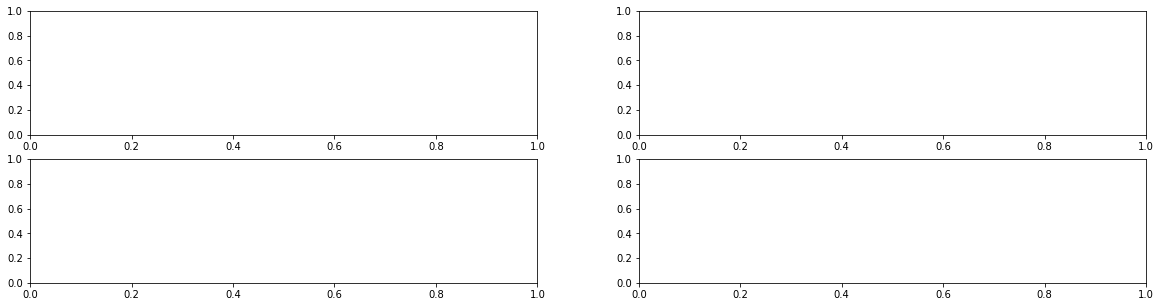

In [21]:
# It is possible to create a grid of multiple plots

fig, axes = plt.subplots(2, 2, figsize=(20,5)) # Define the subplots arrangment and figure size.
axes

If you would like to plot a subplot when the data is in another table you can so by doing the following:

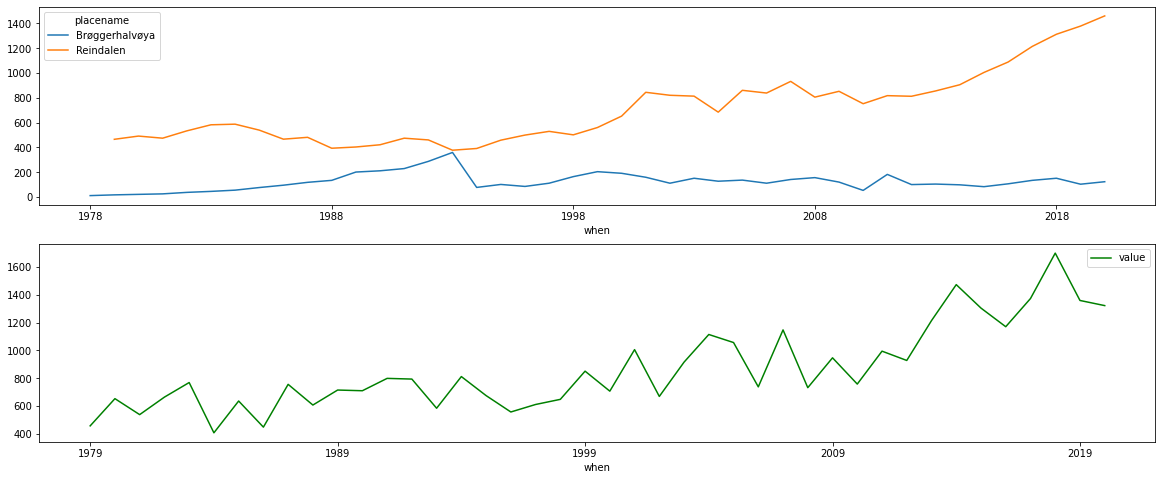

In [22]:
# An example of different subplots on the same figure

fig, axes = plt.subplots(2, 1, figsize=(20,8)) # Define the subplots arrangment and figure size.

area_1_2.plot(ax=axes[0]) # Plot on the first axes
area_3.plot("when","value", ax=axes[1], color="g") # Plot on the second axes


### Exercise 5

**Discuss and note:** 
*   Looking at the x axis what could be confusing about this plot?




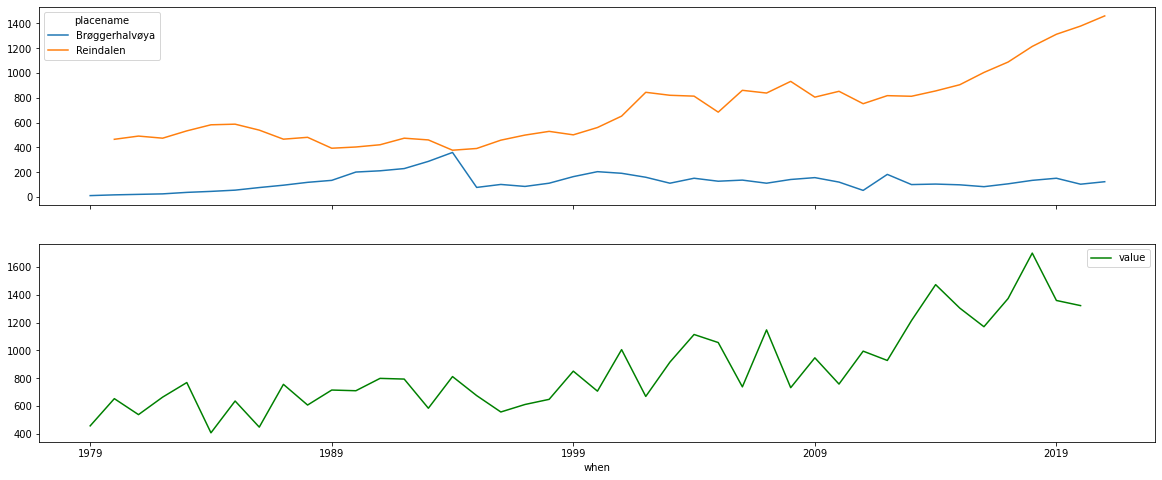

In [23]:
# An example of different subplots on the same figure

fig, axes = plt.subplots(2,1,figsize=(20,8), sharex=True) # Define the subplots arrangment and figure size and share x axis.

area_1_2.plot(ax=axes[0])
area_3.plot("when","value", ax=axes[1], color="g")

# 🥧 **Bar Charts, Pie Charts, and Boxplots**

Now we are going to look to compare populations in the three areas in 2020 using three different plot types and then plot these on to a figure with three subplots:

*   [Bar chart](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
*   [Pie Chart ](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)
*   [Boxplot](https://https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

We haven't covered all the different charts availible in matplotlib! If you would like to experiment with more charts a full list can be found here: https://matplotlib.org/stable/gallery/index.html


In [24]:
# First we need to combine the three dataframes together
area_3_p = area_3.pivot(index="when", columns="placename", values="value") # Pivot pandas table to simplify join
area_1_2_3 = area_1_2.merge(area_3_p, how="left", on="when") # Join dataframe on year

area_1_2_3.head()

placename,Brøggerhalvøya,Reindalen,Adventdalen
when,,,
1978,12,NaN,NaN
1979,18,466.0,457.0
1980,22,492.0,653.0
1981,26,475.0,538.0
1982,38,534.0,664.0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 0.98, 'Svalbard reindeer, Norway')

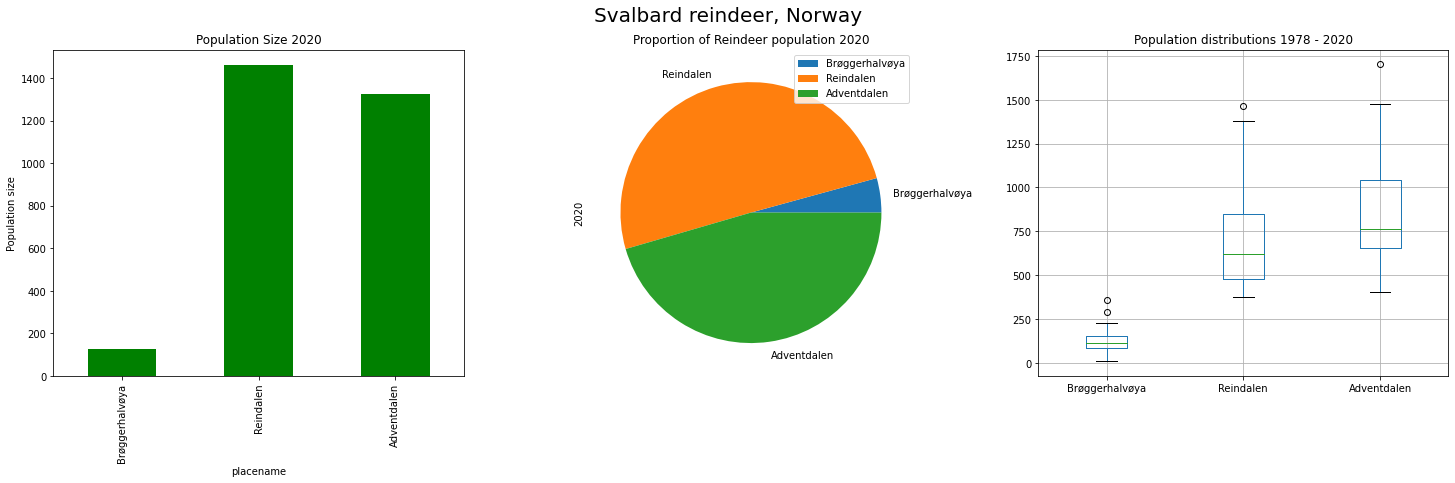

In [25]:
# Now we are going to plot the three different plots using the dataframe area_1_2_3

fig, axes = plt.subplots(1, 3, figsize=(25,6))

# Bar Chart
area_1_2_3.loc["2020"].plot(kind="bar", ax=axes[0], color="g") # Plot a bar chart on the first axes with green bars
axes[0].set_title("Population Size 2020") # Set a title for the first plot
axes[0].set_ylabel("Population size") # Set a y label for the first plot

# Pie Chart
pd.DataFrame(area_1_2_3.loc["2020"]).plot.pie(y="2020", ax=axes[1]) # Plot a pie chart on the second axes
axes[1].set_title("Proportion of Reindeer population 2020") # Set a title for the second plot

# Boxplot
area_1_2_3.boxplot(column=["Brøggerhalvøya",	"Reindalen",	"Adventdalen"], ax=axes[2]) # Plot a boxplot on the third plot stating the three columns to be used
axes[2].set_title("Population distributions 1978 - 2020") # Set a title for the third plot

plt.suptitle("Svalbard reindeer, Norway", fontsize=20) # As well as putting titles for each plot you can create a title for the whole figure.

### Exercise 6

*  Can you produce the same figure above but for the year 2019?

In [26]:
# Please write your solution below:


# 🖌 Get creative


As well as being a great libary to visualise data you can also get creative! 

Here is an interesting article:
https://medium.com/analytics-vidhya/how-to-draw-a-3d-christmas-tree-with-matplotlib-aabb9bc27864

(-500.0, 500.0)

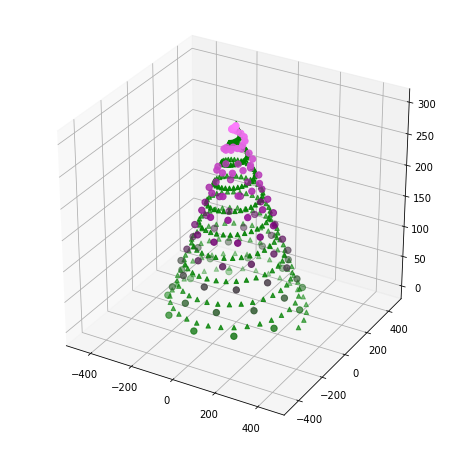

In [27]:
# Code source: https://matplotlib.org/stable/gallery/index.html

import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection="3d")

k=300
Z = [i for i in range(k)]
X = [math.cos(i/5)*(k-i) for i in range(k)]
Y = [math.sin(i/5)*(k-i) for i in range(k)]

ax.scatter(X,Y,Z, c="green", marker="^")

step = 3
c = [(i/k,abs(0.5-i/k),i/k) for i in range(1,k,step)]
Z = [i for i in range(1,k,step)]
X = [math.cos(i/5+2)*(k-i+10) for i in range(1,k,step)]
Y = [math.sin(i/5+2)*(k-i+10) for i in range(1,k,step)]

ax.scatter(X,Y,Z, c=c, marker="o",s=40)

plt.xlim(-500,500)
plt.ylim(-500,500)


# ⭐ Thank you!

If you would like to further practice your matplotlib skills with more datasets here is helpful source of datasets to look through: https://www.nhsx.nhs.uk/key-tools-and-info/nhsx-analytics-unit/dashboards-and-datasets/.